In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
from fastai.vision import *
import shutil
import os
from tqdm import tqdm_notebook as tqdm

In [3]:
MODEL_FOLDER = Path('/home/akash/Roads/Models/Roads-temporary-Production/exported_models')
fname = 'Perceptual_r34_224_10'

In [4]:
learn = load_learner(MODEL_FOLDER, fname)

In [5]:
TEST = Path('/home/akash/Roads/Models/Spacenet_Deepglobe/test.png')
img = open_image(TEST)
x = img.resize(224)

pred = learn.predict(x)
img.show(y=pred[0], figsize=(4,4))

# Generalized

Flow:
1. Get Image
2. Resize to model size
3. Predict
4. Save Result
5. 

In [35]:
PATH = Path('/home/akash/Roads/Datasets/Combined').absolute()
IMAGES = PATH/'Combined_Images'
MASKS = PATH/'Combined_Masks'

In [36]:
IMAGES.ls()

[PosixPath('/home/akash/Roads/Datasets/Combined/Combined_Images/566430.png'),
 PosixPath('/home/akash/Roads/Datasets/Combined/Combined_Images/534866.png'),
 PosixPath('/home/akash/Roads/Datasets/Combined/Combined_Images/836613.png'),
 PosixPath('/home/akash/Roads/Datasets/Combined/Combined_Images/231652.png'),
 PosixPath('/home/akash/Roads/Datasets/Combined/Combined_Images/825884.png'),
 PosixPath('/home/akash/Roads/Datasets/Combined/Combined_Images/168410.png'),
 PosixPath('/home/akash/Roads/Datasets/Combined/Combined_Images/472031.png'),
 PosixPath('/home/akash/Roads/Datasets/Combined/Combined_Images/Shanghai_288.png'),
 PosixPath('/home/akash/Roads/Datasets/Combined/Combined_Images/299828.png'),
 PosixPath('/home/akash/Roads/Datasets/Combined/Combined_Images/Shanghai_894.png'),
 PosixPath('/home/akash/Roads/Datasets/Combined/Combined_Images/239044.png'),
 PosixPath('/home/akash/Roads/Datasets/Combined/Combined_Images/628060.png'),
 PosixPath('/home/akash/Roads/Datasets/Combined/Comb

# Creating small test folder for experimentation

In [45]:
len(IMAGES.ls())

9007

We will build a small dataset of 40 images

In [46]:
Path.cwd()

PosixPath('/home/akash/Roads/Models/Roads-temporary-Production/ImageToMasks')

In [47]:
DATA_OUT = Path('/home/akash/Roads/Models/Roads-temporary-Production/ImageToMasks/sample_images')
DATA_OUT.mkdir(exist_ok=True)

In [48]:
for path in IMAGES.ls()[:40]:
    shutil.copy(path, DATA_OUT/path.name)

<hr>
<hr>

# Prediction pipeline

In [37]:
def get_image(path, imsize=224):
    try:
        return open_image(path).resize(imsize)
    except:
        return 'skip'

In [38]:
def get_prediction(model, image, resize_to=None):
    if resize_to:
        return (model.predict(image)[0]).resize(resize_to)
    else:
        return model.predict(image)[0]

In [49]:
imsize = 224
model = learn
in_folder = DATA_OUT
OUTPUT = Path('/home/akash/Roads/Models/Roads-temporary-Production/ImageToMasks/OUT_MASKS')
OUTPUT.mkdir(exist_ok=True)

In [53]:
def process(model, in_folder, out_folder, imsize=224):
    for f in tqdm(in_folder.iterdir()):
        image = get_image(f, imsize=imsize)
        if image == 'skip':
            continue
        pred = get_prediction(model, image)
        pred.save(out_folder/f.name)

In [54]:
process(model, in_folder, OUTPUT, 224)

Checking:

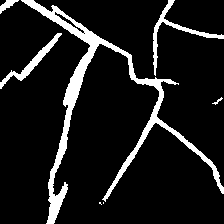

In [58]:
open_image(OUTPUT/'130967.png')